In [ ]:
!pip install  kagglehub

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Load Dataset

# Download dataset
path = kagglehub.dataset_download("linyeping/extra-dataset-with-smilestgpidpolimers-class")

print("Dataset downloaded to:", path)

# Lihat isi folder
print(os.listdir(path))

# pilih file CSV paling besar
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

files_with_size = [(f, os.path.getsize(os.path.join(path, f))) for f in csv_files]
files_sorted = sorted(files_with_size, key=lambda x: x[1], reverse=True)

main_csv = files_sorted[0][0]
file_path = os.path.join(path, main_csv)

df = pd.read_csv(file_path)

Using Colab cache for faster access to the 'extra-dataset-with-smilestgpidpolimers-class' dataset.
Dataset downloaded to: /kaggle/input/extra-dataset-with-smilestgpidpolimers-class
['TgSS_enriched_cleaned.csv']


Overview Data

In [ ]:
df.head(20)

,SMILES,Tg,PID,Polymer Class
0,*C*,-54.0,P010001,Polyolefins
1,*CC(*)C,-3.0,P010002,Polyolefins
2,*CC(*)CC,-24.1,P010003,Polyolefins
3,*CC(*)CCC,-37.0,P010004,Polyolefins
4,*CC(*)C(C)C,60.0,P010006,Polyolefins
5,*CC(*)CCCC,-50.0,P010007,Polyolefins
6,*CC(*)CC(C)C,35.2,P010008,Polyolefins
7,*CC(*)CCCCC,-45.5,P010009,Polyolefins
8,*CC(*)CCCCCCC,-47.0,P010012,Polyolefins
9,*CC(*)CCCCCCCC,-35.0,P010013,Polyolefins


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SMILES         7284 non-null   object 
 1   Tg             7284 non-null   float64
 2   PID            7284 non-null   object 
 3   Polymer Class  7284 non-null   object 
dtypes: float64(1), object(3)
memory usage: 227.8+ KB


In [ ]:
df.describe()

,Tg
count,7284.000000
mean,140.190628
std,112.961182
min,-139.000000
25%,53.112500
50%,132.000000
75%,230.000000
max,495.000000


In [ ]:
df.shape

(7284, 4)

In [ ]:
df.dtypes

,0
SMILES,object
Tg,float64
PID,object
Polymer Class,object


Data Cleaning

In [ ]:
# Identifikasi Tipe Data
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

In [ ]:
# Mengecek missing value
df.isnull().sum()

,0
SMILES,0
Tg,0
PID,0
Polymer Class,0


In [ ]:
# Cek dan hapus duplikat
df.duplicated().sum()
df = df.drop_duplicates()

Exploratory Data Analysis

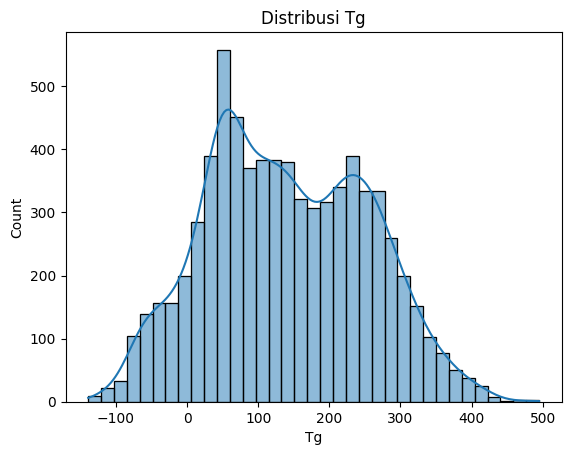

In [ ]:
# Distribusi data numerik
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

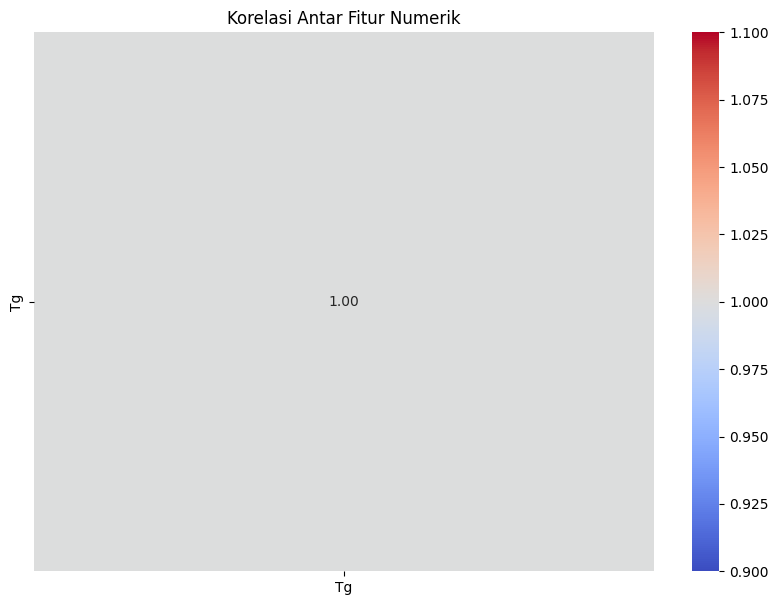

In [ ]:
# Koleras antara variabel
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

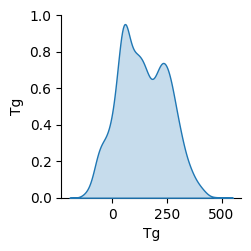

In [ ]:
# Hubungan antar fitur
sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.show()

Normalisasi Data

In [ ]:
# Encoding fitur kategori
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df_scaled.head(50)

,SMILES,Tg,PID,Polymer Class
0,824,-1.721351,0,114
1,1363,-1.269573,1,114
2,1558,-1.456485,2,114
3,1563,-1.570758,3,114
4,1545,-0.711495,4,114
5,1565,-1.685918,5,114
6,1560,-0.931183,6,114
7,1566,-1.646055,7,114
8,1568,-1.659342,8,114
9,1569,-1.553042,9,114


In [ ]:
# simpan Dataset yang sudah bersih
df_scaled.to_csv("EDA_polymers_dataset_alternatif2.csv", index=False)